In [1]:
# import the modules

# import the modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import roc_auc_score ,mean_squared_error,accuracy_score,f1_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
from IPython.display import Image
import pydotplus
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,accuracy_score,classification_report,roc_curve,confusion_matrix
pd.set_option('display.max_columns',None)



### Load the dataset

- Load the train data and using all your knowledge try to explore the different statistical properties of the dataset.

In [2]:
# Code starts here

data_train=pd.read_csv('/users/neha/Desktop/Pragra/Grey_Atom_Tasks/Sprint_9_Boosting_Algorithms/Car_Insurance_Claim/Car_insurance/train.csv')

data_train.head()



# Code ends here

,Unnamed: 0,ID,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,EDUCATION,OCCUPATION,TRAVTIME,CAR_USE,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG
0,3678,531817639,1,42.0,3,9.0,"$4,701",No,$0,Yes,z_F,z_High School,Student,12,Private,"$5,900",1,Sports Car,no,$0,0,No,4,$0,9.0,1
1,2533,738075150,0,50.0,0,7.0,"$10,232",No,"$129,979",Yes,z_F,Masters,Home Maker,33,Private,"$24,470",16,Minivan,no,"$5,458",2,No,3,$0,18.0,0
2,9169,176935775,0,40.0,2,17.0,"$66,200",Yes,"$223,960",z_No,z_F,Bachelors,Manager,53,Private,"$17,260",13,z_SUV,no,$0,0,No,1,$629,9.0,1
3,4174,195054268,2,38.0,2,13.0,"$34,056",No,"$122,908",Yes,z_F,z_High School,z_Blue Collar,29,Commercial,"$6,180",4,Sports Car,no,$502,1,No,5,$0,2.0,0
4,10150,764551255,0,38.0,0,NaN,"$45,734",No,"$222,653",Yes,M,z_High School,Professional,5,Commercial,"$9,870",1,Pickup,no,"$3,296",1,No,3,"$2,156",2.0,1


In [3]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8241 entries, 0 to 8240
Data columns (total 26 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  8241 non-null   int64  
 1   ID          8241 non-null   int64  
 2   KIDSDRIV    8241 non-null   int64  
 3   AGE         8235 non-null   float64
 4   HOMEKIDS    8241 non-null   int64  
 5   YOJ         7799 non-null   float64
 6   INCOME      7779 non-null   object 
 7   PARENT1     8241 non-null   object 
 8   HOME_VAL    7783 non-null   object 
 9   MSTATUS     8241 non-null   object 
 10  GENDER      8241 non-null   object 
 11  EDUCATION   8241 non-null   object 
 12  OCCUPATION  7711 non-null   object 
 13  TRAVTIME    8241 non-null   int64  
 14  CAR_USE     8241 non-null   object 
 15  BLUEBOOK    8241 non-null   object 
 16  TIF         8241 non-null   int64  
 17  CAR_TYPE    8241 non-null   object 
 18  RED_CAR     8241 non-null   object 
 19  OLDCLAIM    8241 non-null  

In [4]:
data_train.describe()

,Unnamed: 0,ID,KIDSDRIV,AGE,HOMEKIDS,YOJ,TRAVTIME,TIF,CLM_FREQ,MVR_PTS,CAR_AGE,CLAIM_FLAG
count,8241.000000,8.241000e+03,8241.000000,8235.000000,8241.000000,7799.000000,8241.000000,8241.000000,8241.000000,8241.000000,7726.000000,8241.000000
mean,5150.582696,4.955035e+08,0.172309,44.426108,0.726004,10.523657,33.236864,5.333212,0.802937,1.718481,7.793684,0.343041
std,2986.031582,2.875996e+08,0.508582,9.063494,1.120816,4.084661,15.885290,4.104653,1.155294,2.163546,5.795045,0.474754
min,2.000000,6.317500e+04,0.000000,14.000000,0.000000,0.000000,5.000000,1.000000,0.000000,0.000000,-1.000000,0.000000
25%,2567.000000,2.411094e+08,0.000000,38.000000,0.000000,9.000000,22.000000,1.000000,0.000000,0.000000,2.000000,0.000000
50%,5126.000000,4.970541e+08,0.000000,45.000000,0.000000,11.000000,33.000000,4.000000,0.000000,1.000000,8.000000,0.000000
75%,7752.000000,7.406986e+08,0.000000,51.000000,1.000000,13.000000,43.000000,7.000000,2.000000,3.000000,12.000000,1.000000
max,10301.000000,9.999264e+08,4.000000,79.000000,5.000000,23.000000,142.000000,25.000000,5.000000,13.000000,28.000000,1.000000


In [5]:
data_train.shape

(8241, 26)

In [6]:
data_train['CLAIM_FLAG'].value_counts()

0    5414
1    2827
Name: CLAIM_FLAG, dtype: int64

In [7]:
# data_train['HOME_VAL']=data_train['HOME_VAL'].str.replace('$','')
# data_train['HOME_VAL']=data_train['HOME_VAL'].str.replace(',','')
# data_train['HOME_VAL'] = data_train['HOME_VAL'].astype(float)

In [8]:
def clean_dollar(df, col):
    df[col] = df[col].str.replace('$','')
    df[col] = df[col].str.replace(',','')
    df[col] = df[col].astype(float)
    return df

In [9]:
clean_dollar(data_train,'CLM_AMT')
clean_dollar(data_train,'INCOME')
clean_dollar(data_train,'HOME_VAL')
clean_dollar(data_train,'BLUEBOOK')
clean_dollar(data_train,'OLDCLAIM')

,Unnamed: 0,ID,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,EDUCATION,OCCUPATION,TRAVTIME,CAR_USE,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG
0,3678,531817639,1,42.0,3,9.0,4701.0,No,0.0,Yes,z_F,z_High School,Student,12,Private,5900.0,1,Sports Car,no,0.0,0,No,4,0.0,9.0,1
1,2533,738075150,0,50.0,0,7.0,10232.0,No,129979.0,Yes,z_F,Masters,Home Maker,33,Private,24470.0,16,Minivan,no,5458.0,2,No,3,0.0,18.0,0
2,9169,176935775,0,40.0,2,17.0,66200.0,Yes,223960.0,z_No,z_F,Bachelors,Manager,53,Private,17260.0,13,z_SUV,no,0.0,0,No,1,629.0,9.0,1
3,4174,195054268,2,38.0,2,13.0,34056.0,No,122908.0,Yes,z_F,z_High School,z_Blue Collar,29,Commercial,6180.0,4,Sports Car,no,502.0,1,No,5,0.0,2.0,0
4,10150,764551255,0,38.0,0,NaN,45734.0,No,222653.0,Yes,M,z_High School,Professional,5,Commercial,9870.0,1,Pickup,no,3296.0,1,No,3,2156.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8236,6400,258417857,0,34.0,0,12.0,NaN,No,125191.0,Yes,M,<High School,z_Blue Collar,25,Commercial,10250.0,1,Pickup,yes,0.0,0,Yes,0,0.0,0.0,0
8237,9160,305082252,0,44.0,0,NaN,67359.0,No,234148.0,z_No,M,Masters,Lawyer,6,Private,13140.0,10,Minivan,no,0.0,0,No,0,0.0,13.0,0
8238,9859,214961196,2,40.0,2,13.0,30129.0,No,111591.0,Yes,z_F,z_High School,Clerical,67,Private,18950.0,6,z_SUV,no,0.0,0,No,0,0.0,9.0,0
8239,1688,856394165,0,32.0,1,11.0,74315.0,Yes,225301.0,z_No,M,Masters,Professional,60,Commercial,24230.0,1,Panel Truck,yes,0.0,0,No,0,0.0,10.0,0


In [10]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8241 entries, 0 to 8240
Data columns (total 26 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  8241 non-null   int64  
 1   ID          8241 non-null   int64  
 2   KIDSDRIV    8241 non-null   int64  
 3   AGE         8235 non-null   float64
 4   HOMEKIDS    8241 non-null   int64  
 5   YOJ         7799 non-null   float64
 6   INCOME      7779 non-null   float64
 7   PARENT1     8241 non-null   object 
 8   HOME_VAL    7783 non-null   float64
 9   MSTATUS     8241 non-null   object 
 10  GENDER      8241 non-null   object 
 11  EDUCATION   8241 non-null   object 
 12  OCCUPATION  7711 non-null   object 
 13  TRAVTIME    8241 non-null   int64  
 14  CAR_USE     8241 non-null   object 
 15  BLUEBOOK    8241 non-null   float64
 16  TIF         8241 non-null   int64  
 17  CAR_TYPE    8241 non-null   object 
 18  RED_CAR     8241 non-null   object 
 19  OLDCLAIM    8241 non-null  

In [11]:
categorical_columns = [c for c in data_train.columns 
                       if data_train[c].dtype.name == 'object']
numerical_columns = [c for c in data_train.columns 
                     if data_train[c].dtype.name != 'object']

print('categorical_columns:', categorical_columns)
print('numerical_columns:', numerical_columns)

categorical_columns: ['PARENT1', 'MSTATUS', 'GENDER', 'EDUCATION', 'OCCUPATION', 'CAR_USE', 'CAR_TYPE', 'RED_CAR', 'REVOKED']
numerical_columns: ['Unnamed: 0', 'ID', 'KIDSDRIV', 'AGE', 'HOMEKIDS', 'YOJ', 'INCOME', 'HOME_VAL', 'TRAVTIME', 'BLUEBOOK', 'TIF', 'OLDCLAIM', 'CLM_FREQ', 'MVR_PTS', 'CLM_AMT', 'CAR_AGE', 'CLAIM_FLAG']


In [12]:
data_train['REVOKED'].value_counts()

No     7239
Yes    1002
Name: REVOKED, dtype: int64

In [13]:
hotencode=['PARENT1','MSTATUS','GENDER','EDUCATION','OCCUPATION','CAR_USE','CAR_TYPE','RED_CAR','REVOKED']

In [14]:
def hot_encode(df, col):
    df[col] = pd.get_dummies(df[col],drop_first=True)
    return df

In [15]:
for c in ['PARENT1','MSTATUS','GENDER','EDUCATION','OCCUPATION','CAR_USE','CAR_TYPE','RED_CAR','REVOKED']:
    data_train = hot_encode(data_train, c)

In [16]:
data_train.head(20)

,Unnamed: 0,ID,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,EDUCATION,OCCUPATION,TRAVTIME,CAR_USE,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG
0,3678,531817639,1,42.0,3,9.0,4701.0,0,0.0,0,1,0,0,12,1,5900.0,1,0,0,0.0,0,0,4,0.0,9.0,1
1,2533,738075150,0,50.0,0,7.0,10232.0,0,129979.0,0,1,0,0,33,1,24470.0,16,0,0,5458.0,2,0,3,0.0,18.0,0
2,9169,176935775,0,40.0,2,17.0,66200.0,1,223960.0,1,1,1,0,53,1,17260.0,13,0,0,0.0,0,0,1,629.0,9.0,1
3,4174,195054268,2,38.0,2,13.0,34056.0,0,122908.0,0,1,0,0,29,0,6180.0,4,0,0,502.0,1,0,5,0.0,2.0,0
4,10150,764551255,0,38.0,0,NaN,45734.0,0,222653.0,0,0,0,0,5,0,9870.0,1,0,0,3296.0,1,0,3,2156.0,2.0,1
5,923,651998401,0,50.0,0,0.0,0.0,0,0.0,1,1,0,0,37,1,6500.0,3,0,0,0.0,0,0,0,2668.0,1.0,1
6,9406,634400043,0,50.0,0,9.0,NaN,0,NaN,0,0,0,0,43,0,8670.0,10,0,1,0.0,0,0,2,0.0,NaN,0
7,897,908951082,0,43.0,0,11.0,93658.0,0,303850.0,0,0,0,0,37,1,6200.0,5,0,0,0.0,0,0,0,0.0,15.0,0
8,747,169535646,0,42.0,0,0.0,0.0,0,56266.0,0,1,1,0,32,1,6200.0,1,0,0,0.0,0,1,0,0.0,2.0,0
9,7274,170442280,0,52.0,0,12.0,28573.0,0,159254.0,0,0,0,0,60,1,9160.0,6,0,1,0.0,0,0,0,0.0,2.0,0


In [17]:
def treat_null_values(df, method):
    if method == 'drop':
        df.dropna(inplace = True)
    elif method == 'mean':
        df.fillna(round(df.mean(),1), inplace = True)
    elif method == 'median':
        df.fillna(df.median(), inplace = True)
    elif method == 'mode':
        df.fillna(df.mode()[0], inplace = True)
    else:
        df.fillna('NA', inplace = True)

In [18]:
print('The null values in every feature are :\n', data_train.isnull().sum())

The null values in every feature are :
 Unnamed: 0      0
ID              0
KIDSDRIV        0
AGE             6
HOMEKIDS        0
YOJ           442
INCOME        462
PARENT1         0
HOME_VAL      458
MSTATUS         0
GENDER          0
EDUCATION       0
OCCUPATION      0
TRAVTIME        0
CAR_USE         0
BLUEBOOK        0
TIF             0
CAR_TYPE        0
RED_CAR         0
OLDCLAIM        0
CLM_FREQ        0
REVOKED         0
MVR_PTS         0
CLM_AMT         0
CAR_AGE       515
CLAIM_FLAG      0
dtype: int64


In [19]:
treat_null_values(data_train['INCOME'], 'mean')
treat_null_values(data_train['HOME_VAL'], 'mean')
treat_null_values(data_train['AGE'], 'mean')
treat_null_values(data_train['CAR_AGE'], 'mean')
treat_null_values(data_train['YOJ'], 'mean')

In [20]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8241 entries, 0 to 8240
Data columns (total 26 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  8241 non-null   int64  
 1   ID          8241 non-null   int64  
 2   KIDSDRIV    8241 non-null   int64  
 3   AGE         8241 non-null   float64
 4   HOMEKIDS    8241 non-null   int64  
 5   YOJ         8241 non-null   float64
 6   INCOME      8241 non-null   float64
 7   PARENT1     8241 non-null   uint8  
 8   HOME_VAL    8241 non-null   float64
 9   MSTATUS     8241 non-null   uint8  
 10  GENDER      8241 non-null   uint8  
 11  EDUCATION   8241 non-null   uint8  
 12  OCCUPATION  8241 non-null   uint8  
 13  TRAVTIME    8241 non-null   int64  
 14  CAR_USE     8241 non-null   uint8  
 15  BLUEBOOK    8241 non-null   float64
 16  TIF         8241 non-null   int64  
 17  CAR_TYPE    8241 non-null   uint8  
 18  RED_CAR     8241 non-null   uint8  
 19  OLDCLAIM    8241 non-null  

### Visualize the data

- Check for the categorical & continuous features. 
- Check out the best plots for plotting between categorical target and continuous features and try making some inferences from these plots.
- Clean the data, apply some data preprocessing and engineering techniques.

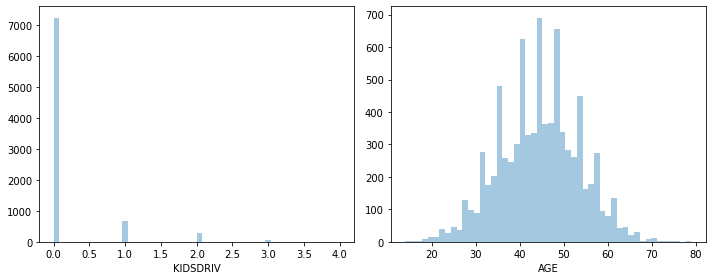

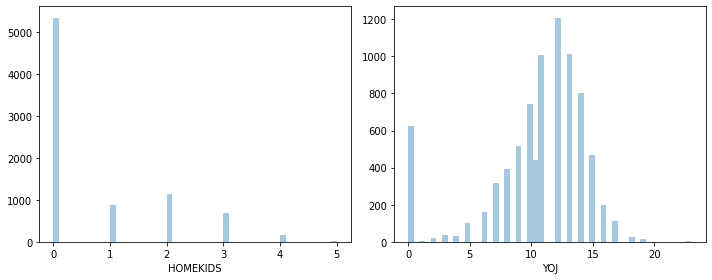

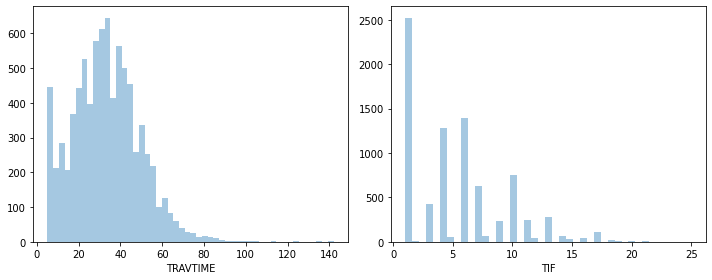

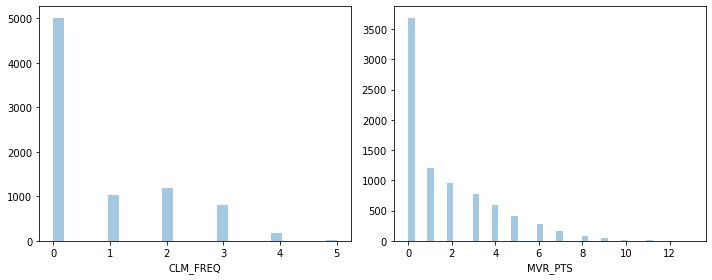

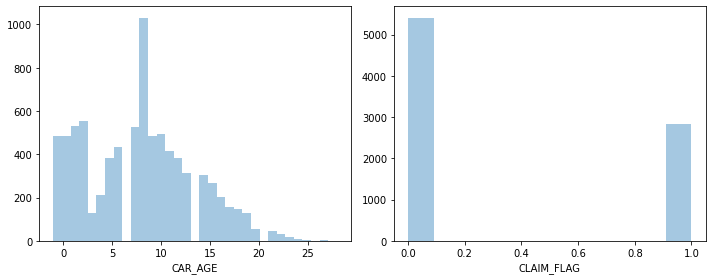

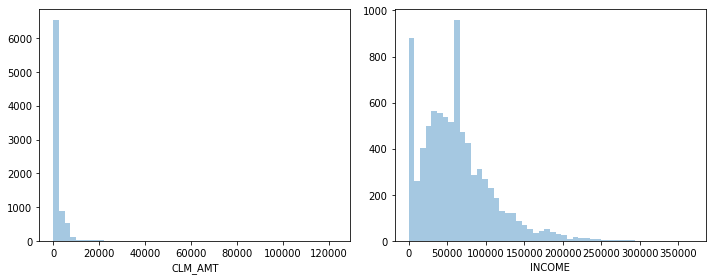

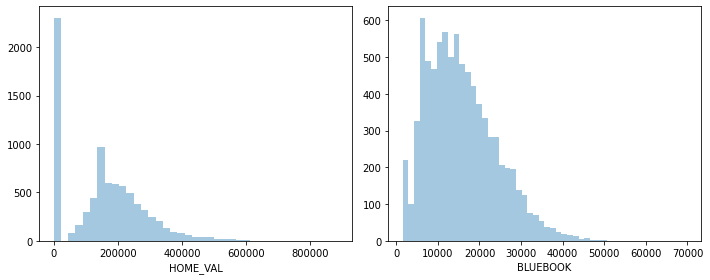

In [21]:
# Code starts here

num_cols = ['KIDSDRIV', 'AGE', 'HOMEKIDS', 'YOJ', 'TRAVTIME', 'TIF', 'CLM_FREQ', 'MVR_PTS', 'CAR_AGE', 'CLAIM_FLAG','CLM_AMT','INCOME','HOME_VAL','BLUEBOOK']
for i in range(0,len(num_cols),2):
    if len(num_cols) > i+1:
        plt.figure(figsize=(10,4))
        plt.subplot(121)
        sns.distplot(data_train[num_cols[i]], kde=False)
        plt.subplot(122)            
        sns.distplot(data_train[num_cols[i+1]], kde=False)
        plt.tight_layout()
        plt.show()

    else:
        sns.distplot(data_train[num_cols[i]], kde=False)

# Code ends here.

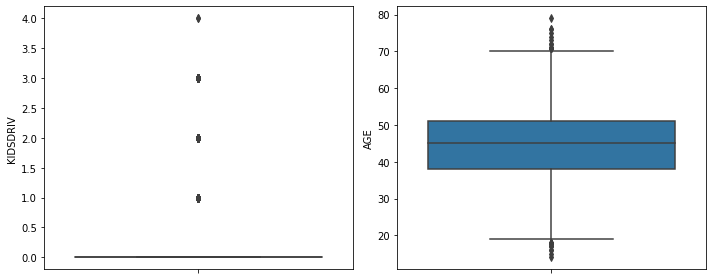

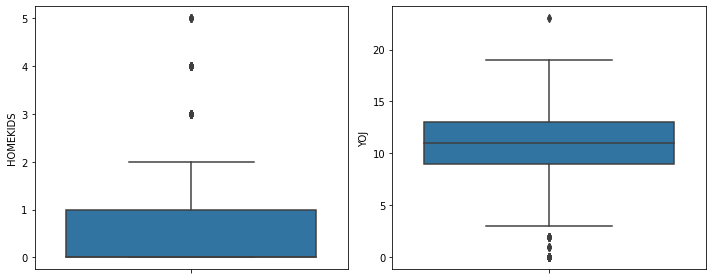

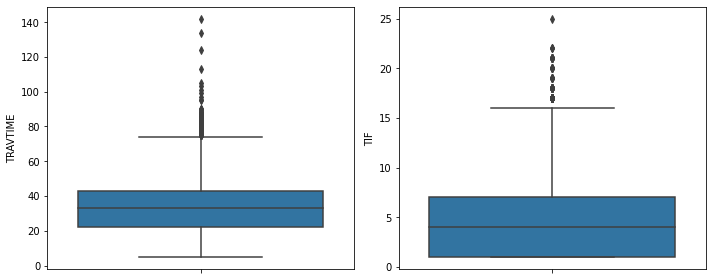

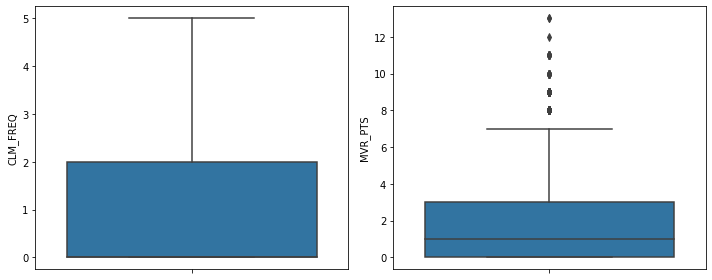

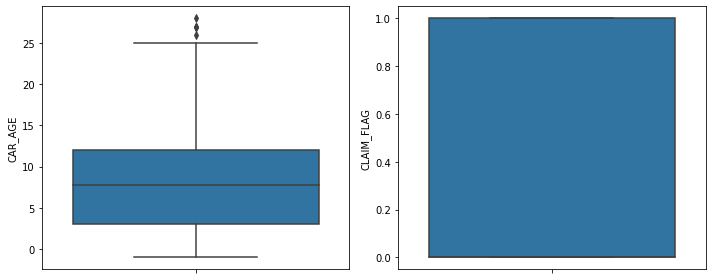

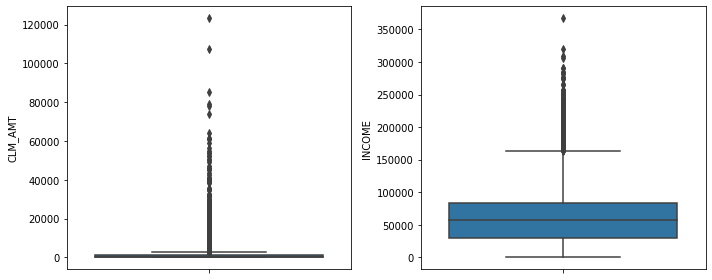

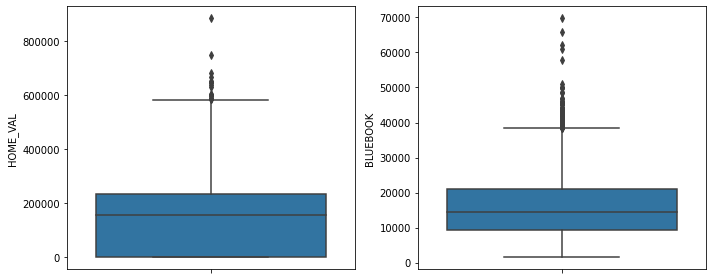

In [22]:
num_cols = ['KIDSDRIV', 'AGE', 'HOMEKIDS', 'YOJ', 'TRAVTIME', 'TIF', 'CLM_FREQ', 'MVR_PTS', 'CAR_AGE', 'CLAIM_FLAG','CLM_AMT','INCOME','HOME_VAL','BLUEBOOK']
facet = None
for i in range(0,len(num_cols),2):
    if len(num_cols) > i+1:
        plt.figure(figsize=(10,4))
        plt.subplot(121)
        sns.boxplot(facet, num_cols[i],data = data_train)
        plt.subplot(122)            
        sns.boxplot(facet, num_cols[i+1],data = data_train)
        plt.tight_layout()
        plt.show()

    else:
        sns.boxplot(facet, num_cols[i],data = data_train)

### Model building

- Separate the features and target.
- Now let's come to the actual task, using Decision Tree, predict the `paid.back.loan`. Use different techniques you have learned to imporove the performance of the model.
- Try improving upon the `accuracy_score` ([Accuracy Score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html))

In [23]:
data_train.drop(['Unnamed: 0','ID'],1, inplace= True)

In [24]:
# Code Starts here
X=data_train.drop(['CLAIM_FLAG'],axis=1)
y=data_train['CLAIM_FLAG'].copy()

# Code ends here

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0,test_size=0.2)

In [26]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)
print('The f1score for a logistic regression model is :' ,f1_score(y_test,y_pred))
print('The accuracy for logistic regression is : ', accuracy_score(y_test,y_pred))

The f1score for a logistic regression model is : 0.6234067207415991
The accuracy for logistic regression is :  0.802910855063675


In [27]:
from imblearn.over_sampling import SMOTE

smote=SMOTE(random_state=0)

X_sample6, y_sample6=smote.fit_resample(X_train, y_train)

model_smote=LogisticRegression(random_state=0)
model_smote.fit(X_sample6,y_sample6)

y_pred=model_smote.predict(X_test)
accuracy_smote=accuracy_score(y_test,y_pred)
print('The accuracy for logistic regression is : ', accuracy_score(y_test,y_pred))

print('The accuracy for f1 score is : ', f1_score(y_test,y_pred))
f1_smote=f1_score(y_test,y_pred)


The accuracy for logistic regression is :  0.8326258338386902
The accuracy for f1 score is :  0.7025862068965517


In [28]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy Score on decision tree: ", accuracy_score(y_test,y_pred))
print('The f1score for a decision tree model is :' ,f1_score(y_test,y_pred))

Accuracy Score on decision tree:  0.7119466343238327
The f1score for a decision tree model is : 0.5685740236148955


In [29]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
model_10 = GradientBoostingClassifier(n_estimators=10, max_depth=6, random_state=0).fit(X_train, y_train)
model_50 = GradientBoostingClassifier(n_estimators=50, max_depth=6, random_state=0).fit(X_train, y_train)
model_100 = GradientBoostingClassifier(n_estimators=100, max_depth=6, random_state=0).fit(X_train, y_train)

print("Accuracy on test data for model_10: ",model_10.score(X_test,y_test))
print("Accuracy on test data for model_50: ",model_50.score(X_test,y_test))
print("Accuracy on test data for model_100: ",model_100.score(X_test,y_test))

Accuracy on test data for model_10:  0.8399029714978775
Accuracy on test data for model_50:  0.8405093996361431
Accuracy on test data for model_100:  0.8380836870830807


### Prediction on the test data and creating the sample submission file.

- Load the test data and store the `Id` column in a separate variable.
- Perform the same operations on the test data that you have performed on the train data.
- Create the submission file as a `csv` file consisting of the `Id` column from the test data and your prediction as the second column.

In [30]:
# Code Starts here

data_test=pd.read_csv('/users/neha/Desktop/Pragra/Grey_Atom_Tasks/Sprint_9_Boosting_Algorithms/Car_Insurance_Claim/Car_insurance/test.csv')
data_test.head()
# Code ends here

,Unnamed: 0,ID,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,EDUCATION,OCCUPATION,TRAVTIME,CAR_USE,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE
0,635,968418547,0,36.0,2,14.0,"$58,833",No,"$193,644",Yes,M,Bachelors,z_Blue Collar,41,Commercial,"$17,680",1,Van,yes,$0,0,Yes,2,"$4,611",11.0
1,4189,59213729,0,47.0,0,NaN,"$35,259",No,$0,z_No,M,Masters,Lawyer,8,Private,"$12,850",4,Minivan,no,"$1,304",1,No,5,$0,14.0
2,5062,653092892,0,48.0,0,11.0,"$126,442",No,$0,z_No,M,Masters,NaN,41,Commercial,"$7,820",7,Pickup,yes,$0,0,No,0,$0,12.0
3,8325,475325469,0,46.0,0,9.0,"$71,192",No,"$263,204",Yes,z_F,Masters,Lawyer,8,Private,"$6,360",1,z_SUV,no,$0,0,No,0,$0,18.0
4,9281,837299054,0,46.0,0,12.0,"$67,381",No,"$226,928",Yes,z_F,Masters,Lawyer,34,Private,"$27,630",4,Pickup,no,"$6,149",3,No,4,$0,9.0


In [31]:
data_test.shape

(2061, 25)

In [32]:
for c in ['PARENT1','MSTATUS','GENDER','EDUCATION','OCCUPATION','CAR_USE','CAR_TYPE','RED_CAR','REVOKED']:
    data_test = hot_encode(data_test, c)

In [33]:
clean_dollar(data_test,'CLM_AMT')
clean_dollar(data_test,'INCOME')
clean_dollar(data_test,'HOME_VAL')
clean_dollar(data_test,'BLUEBOOK')
clean_dollar(data_test,'OLDCLAIM')

,Unnamed: 0,ID,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,EDUCATION,OCCUPATION,TRAVTIME,CAR_USE,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE
0,635,968418547,0,36.0,2,14.0,58833.0,0,193644.0,0,0,1,0,41,0,17680.0,1,0,1,0.0,0,1,2,4611.0,11.0
1,4189,59213729,0,47.0,0,NaN,35259.0,0,0.0,1,0,0,0,8,1,12850.0,4,0,0,1304.0,1,0,5,0.0,14.0
2,5062,653092892,0,48.0,0,11.0,126442.0,0,0.0,1,0,0,0,41,0,7820.0,7,0,1,0.0,0,0,0,0.0,12.0
3,8325,475325469,0,46.0,0,9.0,71192.0,0,263204.0,0,1,0,0,8,1,6360.0,1,0,0,0.0,0,0,0,0.0,18.0
4,9281,837299054,0,46.0,0,12.0,67381.0,0,226928.0,0,1,0,0,34,1,27630.0,4,0,0,6149.0,3,0,4,0.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2056,3139,967774042,0,34.0,1,10.0,16715.0,1,85406.0,1,0,0,0,32,0,6190.0,6,0,0,5900.0,1,0,7,2877.0,-1.0
2057,7281,286953450,1,40.0,2,NaN,122572.0,0,315539.0,0,1,0,0,17,1,14750.0,9,0,0,0.0,0,0,3,0.0,12.0
2058,3164,768784217,0,50.0,0,4.0,40481.0,0,0.0,1,1,0,0,24,1,6600.0,6,0,0,0.0,0,0,0,0.0,-1.0
2059,2915,556567348,0,41.0,1,15.0,79991.0,0,232559.0,0,1,0,0,29,0,28270.0,10,0,0,0.0,0,0,0,0.0,10.0


In [34]:
treat_null_values(data_test['INCOME'], 'mean')
treat_null_values(data_test['HOME_VAL'], 'mean')
treat_null_values(data_test['AGE'], 'mean')
treat_null_values(data_test['CAR_AGE'], 'mean')
treat_null_values(data_test['YOJ'], 'mean')


In [35]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2061 entries, 0 to 2060
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2061 non-null   int64  
 1   ID          2061 non-null   int64  
 2   KIDSDRIV    2061 non-null   int64  
 3   AGE         2061 non-null   float64
 4   HOMEKIDS    2061 non-null   int64  
 5   YOJ         2061 non-null   float64
 6   INCOME      2061 non-null   float64
 7   PARENT1     2061 non-null   uint8  
 8   HOME_VAL    2061 non-null   float64
 9   MSTATUS     2061 non-null   uint8  
 10  GENDER      2061 non-null   uint8  
 11  EDUCATION   2061 non-null   uint8  
 12  OCCUPATION  2061 non-null   uint8  
 13  TRAVTIME    2061 non-null   int64  
 14  CAR_USE     2061 non-null   uint8  
 15  BLUEBOOK    2061 non-null   float64
 16  TIF         2061 non-null   int64  
 17  CAR_TYPE    2061 non-null   uint8  
 18  RED_CAR     2061 non-null   uint8  
 19  OLDCLAIM    2061 non-null  

In [36]:
data_test.drop(['ID'],1, inplace= True)

In [37]:
# Code Starts here

# Storing the id from the test file
id_ = data_test['Unnamed: 0']
data_test.drop(['Unnamed: 0'],1,inplace=True)
# Predict on the test data
y_pred_test = model_smote.predict(data_test)

# Create a sample submission file
final_submission = pd.DataFrame({'Unnamed: 0':id_,'CLAIM_FLAG':y_pred_test})

# Convert the sample Unnamed: 0submission file into a csv file
final_submission.to_csv('final_submission.csv',index=False)

# Code ends here